## IMDb Top 250 Movie analysis and predictive modeling

In this project I will be looking at IMDb top 250 movies to understand, what factors led to certain ratings for these movies and will also build a model predicting the rating.

Data comes from the IMBDpie API. Same information you can scrape from the web - but if the website has an API option - gathering the data becomes a little easier. The dataset is top 250 movies as rated by IMDb users and covers almost 100 years - starting from 1920 and ending with 2017. Data I will be working with includes: movie title, rating, number of votes, genre, names of actors and directors, year of release. Movie rating is my target variable.

I will do feature selection to find out, which factors are the most direct predictors of rating and will build multiclass classification model. Predictions can be used in recommendation systems, to continually update suggestions, for movie listings and other features.

In [2]:
import pandas as pd
import seaborn as sns
from imdbpie import Imdb
imdb = Imdb()
imdb = Imdb(anonymize=True) 
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import urllib
% matplotlib inline

In [3]:
data = imdb.top_250()

In [4]:
## exploring the data to extract the information for my analysis.
df = pd.DataFrame(data)

In [5]:
df.columns

Index([u'can_rate', u'image', u'num_votes', u'rating', u'tconst', u'title',
       u'type', u'year'],
      dtype='object')

In [6]:
df.head()

,can_rate,image,num_votes,rating,tconst,title,type,year
0,True,{u'url': u'https://images-na.ssl-images-amazon...,1813715,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,True,{u'url': u'https://images-na.ssl-images-amazon...,1238696,9.2,tt0068646,The Godfather,feature,1972
2,True,{u'url': u'https://images-na.ssl-images-amazon...,852568,9.0,tt0071562,The Godfather: Part II,feature,1974
3,True,{u'url': u'https://images-na.ssl-images-amazon...,1793971,9.0,tt0468569,The Dark Knight,feature,2008
4,True,{u'url': u'https://images-na.ssl-images-amazon...,491618,8.9,tt0050083,12 Angry Men,feature,1957


In [7]:
title = imdb.get_title_by_id("tt0468569")
title

<Title: u'The Dark Knight' - u'tt0468569'>

In [8]:
title.genres

[u'Action', u'Crime', u'Drama', u'Thriller']

In [9]:
title.directors_summary

[<Person: u'Christopher Nolan' (u'nm0634240')>]

In [10]:
title.cast_summary

[<Person: u'Christian Bale' (u'nm0000288')>,
 <Person: u'Heath Ledger' (u'nm0005132')>,
 <Person: u'Aaron Eckhart' (u'nm0001173')>,
 <Person: u'Michael Caine' (u'nm0000323')>]

In [11]:
imdb.get_title_by_id("tt0468569").genres

[u'Action', u'Crime', u'Drama', u'Thriller']

In [12]:
genres =[]
for tconst in df['tconst']:
    try:
        g = imdb.get_title_by_id(tconst).genres
        genres.append(g)
    except:
        imdb.get_title_by_id(tconst).genres = None
        g='none'
        genres.append(g)
    print '.',

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [13]:
len(genres)

250

In [15]:
df['genre'] = genres

In [19]:
df.head(2)

,can_rate,image,num_votes,rating,tconst,title,type,year,genre
0,True,{u'url': u'https://images-na.ssl-images-amazon...,1813715,9.3,tt0111161,The Shawshank Redemption,feature,1994,"[Crime, Drama]"
1,True,{u'url': u'https://images-na.ssl-images-amazon...,1238696,9.2,tt0068646,The Godfather,feature,1972,"[Crime, Drama]"


In [20]:
directors =[]
for tconst in df['tconst']:
    try:
        d = imdb.get_title_by_id(tconst).directors_summary
        directors.append(d)
    except:
        imdb.get_title_by_id(tconst).directors_summary = None
        d='none'
        directors.append(d)
    print '.',

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [21]:
df['directors'] = directors

In [22]:
cast =[]
for tconst in df['tconst']:
    try:
        c = imdb.get_title_by_id(tconst).cast_summary
        cast.append(c)
    except:
        imdb.get_title_by_id(tconst).cast_summary = None
        c='none'
        cast.append(c)
    print '.',

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [23]:
df['cast'] = cast

In [25]:
df.head(2)

,can_rate,image,num_votes,rating,tconst,title,type,year,genre,directors,cast
0,True,{u'url': u'https://images-na.ssl-images-amazon...,1813715,9.3,tt0111161,The Shawshank Redemption,feature,1994,"[Crime, Drama]",[<Person: Frank Darabont (nm0001104)>],"[<Person: Tim Robbins (nm0000209)>, <Person: M..."
1,True,{u'url': u'https://images-na.ssl-images-amazon...,1238696,9.2,tt0068646,The Godfather,feature,1972,"[Crime, Drama]",[<Person: Francis Ford Coppola (nm0000338)>],"[<Person: Marlon Brando (nm0000008)>, <Person:..."


In [56]:
# df.to_csv('movies_imdb.csv', encoding='utf-8')
data = pd.read_csv('movies_imdb.csv')

In [57]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [58]:
for g in data['genre']:
    try:
        data['genre'] = data['genre'].str.lstrip('[')
    except:
        pass
    
    try:
        data['genre'] = data['genre'].str.strip(']')
    except:
        pass
    

In [59]:
data['directors'] = [x.strip('[<Person: ') for x in data['directors']]
data['directors'] = [x.partition('(')[0] for x in data['directors']]

In [60]:
data.head(2)    

,can_rate,image,num_votes,rating,tconst,title,type,year,genre,directors,cast
0,True,{u'url': u'https://images-na.ssl-images-amazon...,1785133,9.3,tt0111161,The Shawshank Redemption,feature,1994,"Crime, Drama",Frank Darabont,"[<Person: Tim Robbins (nm0000209)>, <Person: M..."
1,True,{u'url': u'https://images-na.ssl-images-amazon...,1218528,9.2,tt0068646,The Godfather,feature,1972,"Crime, Drama",Francis Ford Coppola,"[<Person: Marlon Brando (nm0000008)>, <Person:..."


In [61]:
data['cast'] = [x.strip('[<Person: ') for x in data['cast']]

In [62]:
data['actor1'] = [x.partition('(')[0] for x in data['cast']]

In [63]:
data['actor2'] = [x.partition('<Person: ')[2] for x in data['cast']]
data['actor2'] = [x.partition('(')[0] for x in data['actor2']]

In [64]:
data['actor3'] = [x.partition(',')[2] for x in data['cast']]
data['actor3'] = [x.partition('<Person: ')[2] for x in data['actor3']]
data['actor3'] = [x.partition('<Person: ')[2] for x in data['actor3']]
data['actor3'] = [x.partition('(')[0] for x in data['actor3']]

In [65]:
data.head(2)

,can_rate,image,num_votes,rating,tconst,title,type,year,genre,directors,cast,actor1,actor2,actor3
0,True,{u'url': u'https://images-na.ssl-images-amazon...,1785133,9.3,tt0111161,The Shawshank Redemption,feature,1994,"Crime, Drama",Frank Darabont,"Tim Robbins (nm0000209)>, <Person: Morgan Free...",Tim Robbins,Morgan Freeman,Bob Gunton
1,True,{u'url': u'https://images-na.ssl-images-amazon...,1218528,9.2,tt0068646,The Godfather,feature,1972,"Crime, Drama",Francis Ford Coppola,"Marlon Brando (nm0000008)>, <Person: Al Pacino...",Marlon Brando,Al Pacino,James Caan


In [66]:
data['can_rate'].value_counts()

True    250
Name: can_rate, dtype: int64

In [67]:
#Dropping 'can_rate' column as it contains same value for all entries.
data.drop('can_rate', inplace=True, axis=1)

In [68]:
data['type'].value_counts()

feature    250
Name: type, dtype: int64

In [69]:
# Same goes for 'type' column - deleting it as all movies in the dataframe are feature films.
data.drop('type', inplace=True, axis=1)

In [70]:
#Correcting some misspellings manualy.
data.ix[data['actor1']=='aul Newman ']

,image,num_votes,rating,tconst,title,year,genre,directors,cast,actor1,actor2,actor3
91,{u'url': u'https://images-na.ssl-images-amazon...,185268,8.3,tt0070735,The Sting,1973,"Comedy, Crime, Drama",George Roy Hill,"aul Newman (nm0000056)>, <Person: Robert Redfo...",aul Newman,Robert Redford,Robert Shaw
171,{u'url': u'https://images-na.ssl-images-amazon...,125649,8.2,tt0061512,Cool Hand Luke,1967,"Crime, Drama",Stuart Rosenberg,"aul Newman (nm0000056)>, <Person: George Kenne...",aul Newman,George Kennedy,Strother Martin
198,{u'url': u'https://images-na.ssl-images-amazon...,160135,8.1,tt0064115,Butch Cassidy and the Sundance Kid,1969,"Biography, Crime, Drama, Western",George Roy Hill,"aul Newman (nm0000056)>, <Person: Robert Redfo...",aul Newman,Robert Redford,Katharine Ross


In [71]:
data['actor1'] = [x.replace('aul Newman ', 'Paul Newman') for x in data['actor1']]

In [72]:
data[data.actor1.str.contains('Mifune')==True]

,image,num_votes,rating,tconst,title,year,genre,directors,cast,actor1,actor2,actor3
18,{u'url': u'https://images-na.ssl-images-amazon...,241095,8.7,tt0047478,Seven Samurai,1954,"Adventure, Drama",Akira Kurosawa,"u'Toshir\xf4 Mifune' (u'nm0001536')>, <Person:...",u'Toshir\xf4 Mifune',Takashi Shimura,Keiko Tsushima
108,{u'url': u'https://images-na.ssl-images-amazon...,108957,8.3,tt0042876,Rashomon,1950,"Crime, Drama, Mystery",Akira Kurosawa,"u'Toshir\xf4 Mifune' (u'nm0001536')>, <Person:...",u'Toshir\xf4 Mifune',u'Machiko Ky\xf4',Masayuki Mori
113,{u'url': u'https://images-na.ssl-images-amazon...,78178,8.3,tt0055630,Yojimbo,1961,"Action, Drama, Thriller",Akira Kurosawa,"u'Toshir\xf4 Mifune' (u'nm0001536')>, <Person:...",u'Toshir\xf4 Mifune',u'Eijir\xf4 T\xf4no',Tatsuya Nakadai


In [73]:
data.loc[data['title'] == 'Seven Samurai', ['actor1']] ='Toshiro Mifune'
data.loc[data['title'] == 'Rashomon', ['actor1']] ='Toshiro Mifune'
data.loc[data['title'] == 'Yojimbo', ['actor1']] ='Toshiro Mifune'

In [74]:
# Correcting misspellings in directors' names.
data['directors'] = [x.replace('te Docter', 'Peter Docter') for x in data['directors']]
data['directors'] = [x.replace('ter Jackson', 'Peter Jackson') for x in data['directors']]

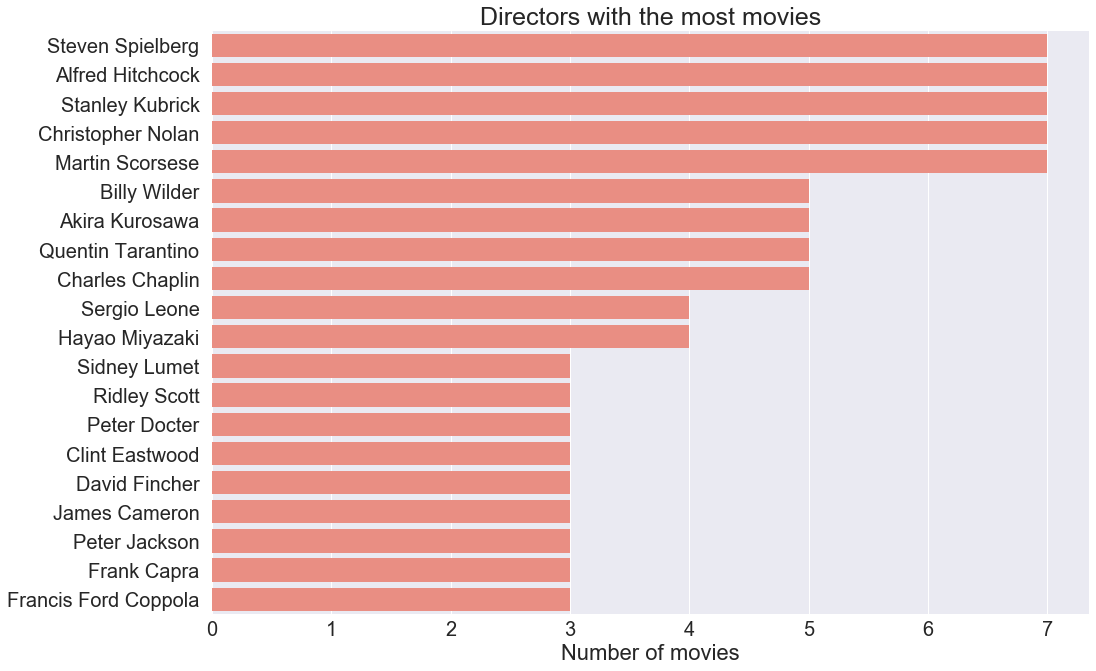

In [75]:
top_20_directors = data['directors'].value_counts().head(20).to_frame()
top_20_directors = top_20_directors.reset_index()
top_20_directors.columns = ['director', 'number_movies']

plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = sns.barplot(x="number_movies", y="director", color ='salmon', data=top_20_directors)
ax.set_title('Directors with the most movies', fontsize = 25)
ax.set(xlabel='Number of movies', ylabel='')
plt.show()


Looking at directors with the most movies - in a relatively short list of 250 movies Steven Spielberg, Alfred Hitchcock, Stanley Kibrik, Christopher Nolan and Martin Scorsese made it to the list 7 times each! To me this looks like director's name would make for a strong feature in a predictive model.

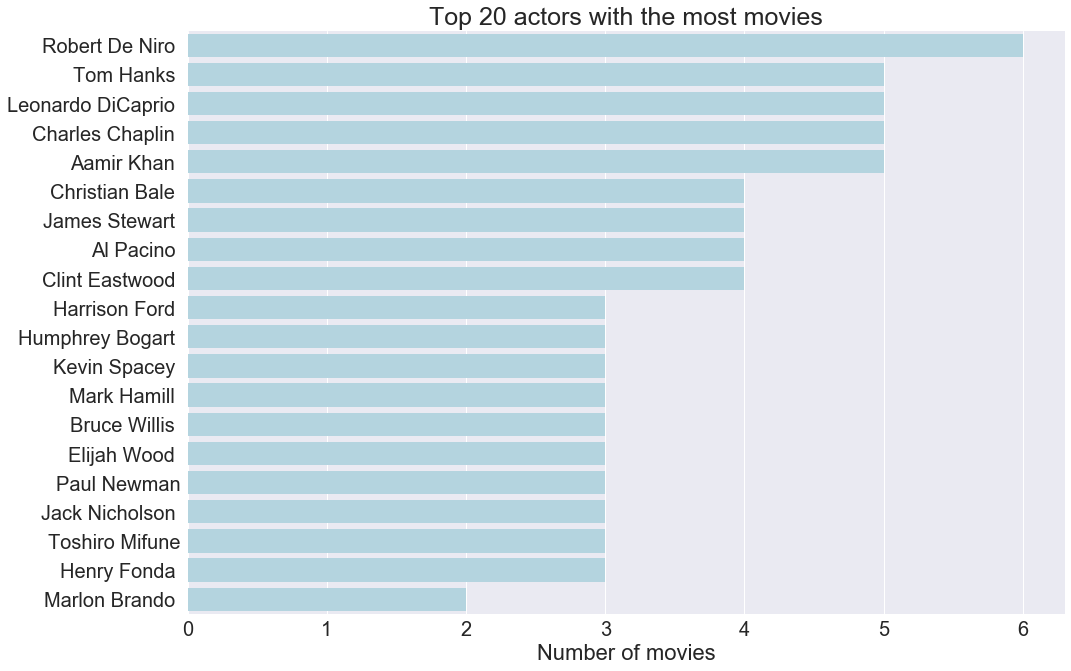

In [79]:
top_20_actors = data['actor1'].value_counts().head(20).to_frame()
top_20_actors =top_20_actors.reset_index()
top_20_actors.columns = ['actor', 'number_movies']

plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = sns.barplot(x="number_movies", y="actor", color ='lightblue', data=top_20_actors)
ax.set_title('Top 20 actors with the most movies', fontsize = 25)
ax.set(xlabel='Number of movies', ylabel='')
plt.show()

Same as with the directors - looks like a group of actors appeared in highest rated movies more times, than anybody else. 250 is a minuscule fraction of movies, that are made and majority of actors there are did not even make it to the list and a small group of actors appeared there multiple times. Some actors and directors are literally associated with success.

Another detail that I could not help but notice - all top actors and directors are men. These plots mirror the social order of the century. Women got their right to vote the same year the oldest movie in this list was produced. Women were not a dominant part of society and thus, seems to me, were not interesting to make a movie about. For hundred years, men were shooting movies about other men. It seems to be changing recently, with female actresses and directors slowly shifting this imbalance. 

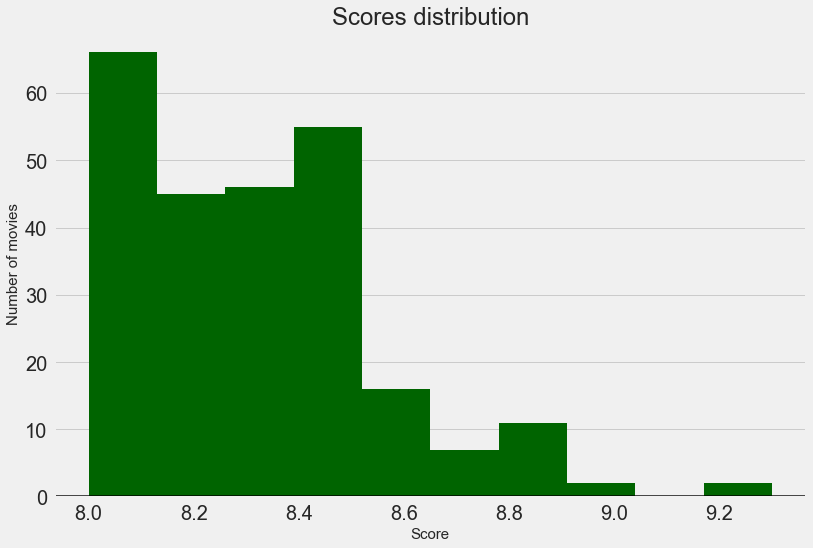

In [89]:
# I am dealing with the highest rated movies and these are only with scores of 8 and higher. 
 
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.hist(data['rating'], color = 'darkgreen')
plt.legend(loc='center', fontsize = 13)
plt.grid(which = 'major', axis = 'x')
plt.axhline(0, color='black', alpha = 0.7)
plt.title( 'Scores distribution', fontsize = 24)
plt.xlabel('Score', fontsize = 15)
plt.ylabel('Number of movies', fontsize = 15 )
plt.show()

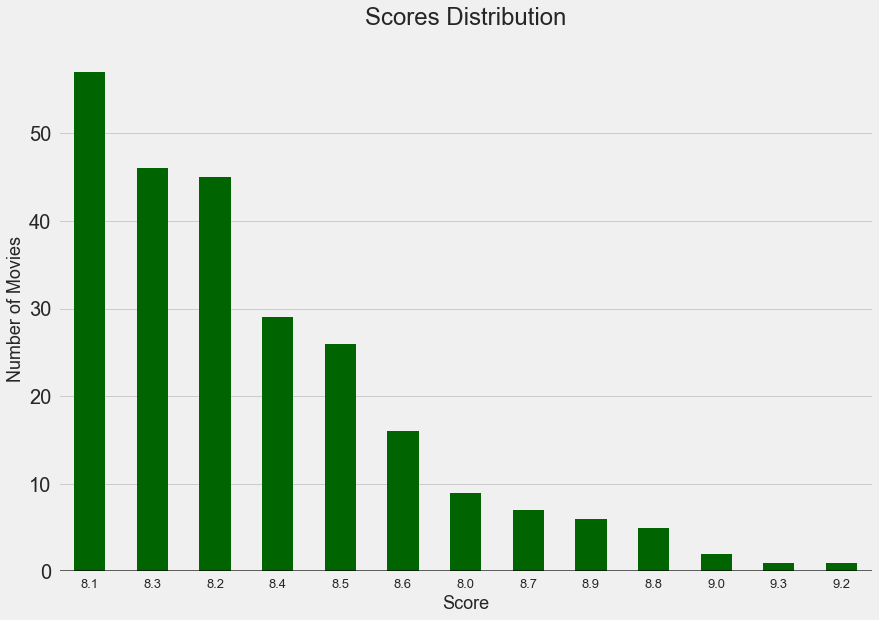

In [90]:
plt.figure(figsize=(13,9))
plt.style.use('fivethirtyeight')

y = pd.DataFrame(data['rating'].value_counts())

y['rating'].plot.bar(color = 'darkgreen')

plt.title('Scores Distribution', fontsize = 24, y = 1.03)

# y label
plt.ylabel('Number of Movies', fontsize = 18)

# x label
plt.xlabel('Score', fontsize = 18)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation=0, fontsize = 13)

plt.grid(which = 'major', axis = 'x')
plt.show()

Most movies have scores between 8 and 9. Very few movies have a score over 9 points.

In [91]:
## Making a dictionary so that I can check how many movies there are in each genre.
genres = ['Crime', 'Drama', 'Action', 'Thriller', 'Biography', 'History', 'Adventure', 'Fantasy', 'Sci-Fi', 'Western', \
'Comedy', 'Romance', 'Mystery', 'War', 'Film-Noir', 'Family', 'Musical', 'Horror', 'Animation', 'Sport']

In [92]:
genres_dict = {'Crime': 0, 'Drama' : 0, 'Action':0, 'Thriller':0, 'Biography':0, 'History':0, 'Adventure':0, 'Fantasy':0, 'Sci-Fi':0, 'Western':0, \
'Comedy':0, 'Romance':0, 'Mystery':0, 'War':0, 'Film-Noir':0, 'Family':0, 'Musical':0, 'Horror':0, 'Animation':0, 'Sport':0}


In [93]:
for gen in genres:
    
    for i in range(len(data)):
        
        if gen in data.loc[i, 'genre']:
            genres_dict[gen] +=1
            
        else:
            continue

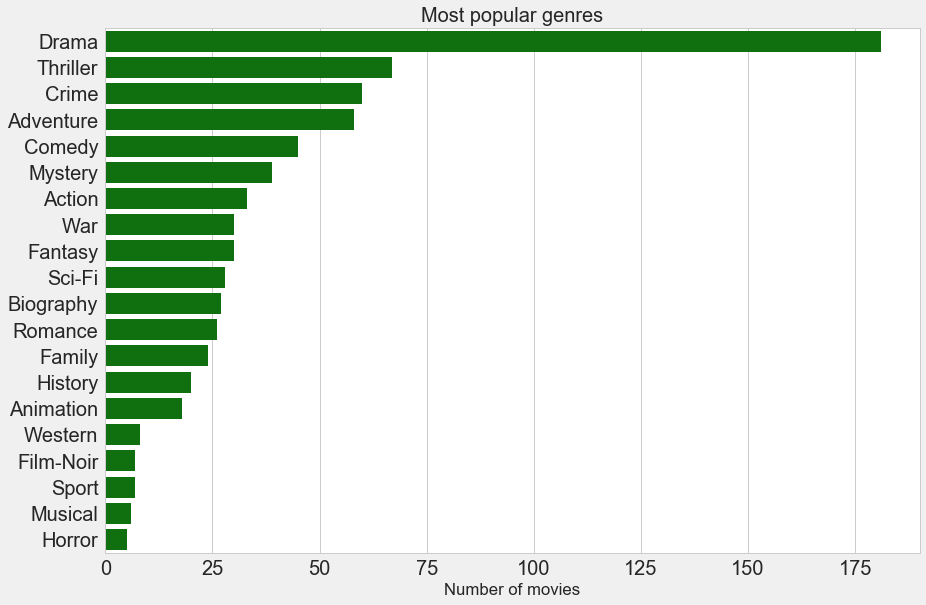

In [94]:
genres_df = pd.DataFrame.from_dict(genres_dict, orient = 'index')
genres_df = genres_df.reset_index()
genres_df.columns = ['genre', 'number_movies']
genres_df.sort_values(by = 'number_movies', ascending = 0, inplace=True)

plt.figure(figsize=(13, 9))
sns.set_style("whitegrid")
ax = sns.barplot(x="number_movies", y="genre", color ='green', data=genres_df)
ax.set_title('Most popular genres', fontsize=20)
ax.set(xlabel='Number of movies', ylabel='')
plt.show()

Drama, as an absolute favorite, with Thriller, Crime and Adventure are top most popular movie genres. Overall, everything that pushes blood pressure higher. 

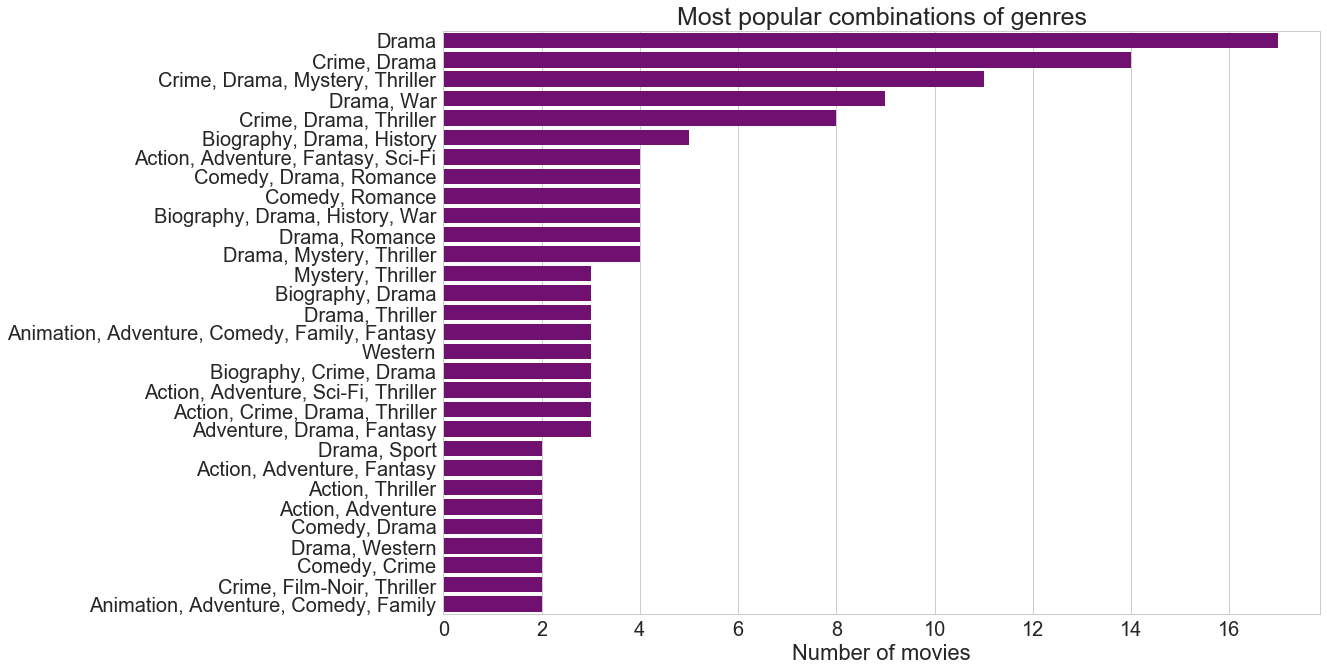

In [96]:
# When dealing with genres I think what's also important is the combination. 
# Lets see if combination of genres in a movie tells us anything new.
g = data['genre'].value_counts().to_frame()
g = g.reset_index()
g.columns = ['genre', 'number_movies']
top_30_genres = g.head(30)

plt.figure(figsize=(14, 10))
sns.set(font_scale=2)
sns.set_style("whitegrid")
ax = sns.barplot(x="number_movies", y="genre", color ='purple', data=top_30_genres)
ax.set_title('Most popular combinations of genres', fontsize=25 )
ax.set(xlabel='Number of movies', ylabel='')
plt.show()

Still a lot of Drama. And combinations of drama with crime and generally edgy genres. Does not look like any feel-good movies made any top
positions - people favor movies that thrill them.

In [97]:
data['year'].min()

1921

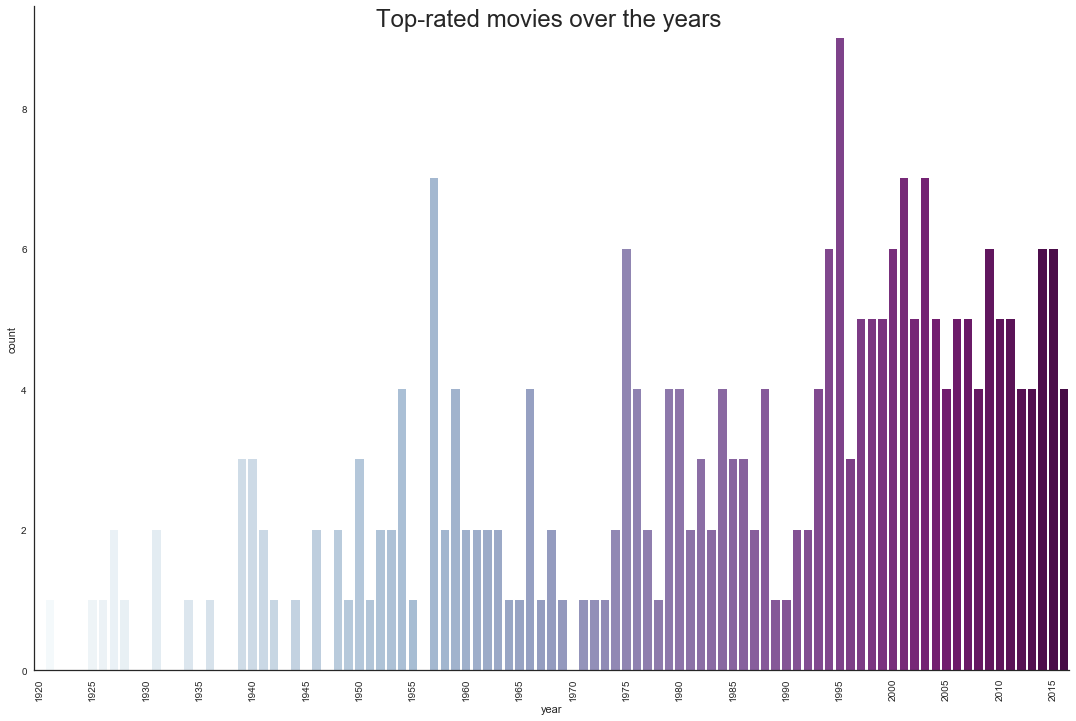

In [103]:
plt.figure(figsize=(10, 6))
sns.set(style="white")
years = np.arange(1920, 2017)
g = sns.factorplot(x="year", data=data, kind="count",
                   palette="BuPu", size=10, aspect=1.5, order=years)
g.set_xticklabels(step=5)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Top-rated movies over the years', fontsize=24)

### Modeling

Preparing the data

Using names of actors and directors as features in my data matrix

In [104]:
len(data.actor1.unique())

183

In [105]:
# Creating a list of all actors

unique_actors = []
for i in range(len(data)):
    if data.loc[i, 'actor1'] in unique_actors:
        pass
    else:
        unique_actors.append(data.loc[i, 'actor1'])
    if data.loc[i, 'actor2'] in unique_actors:
        pass
    else:
        unique_actors.append(data.loc[i, 'actor2'])
        
    if data.loc[i, 'actor3'] in unique_actors:
        pass
    else:
        unique_actors.append(data.loc[i, 'actor3'])

In [106]:
data.head(2)

,image,num_votes,rating,tconst,title,year,genre,directors,cast,actor1,actor2,actor3
0,{u'url': u'https://images-na.ssl-images-amazon...,1785133,9.3,tt0111161,The Shawshank Redemption,1994,"Crime, Drama",Frank Darabont,"Tim Robbins (nm0000209)>, <Person: Morgan Free...",Tim Robbins,Morgan Freeman,Bob Gunton
1,{u'url': u'https://images-na.ssl-images-amazon...,1218528,9.2,tt0068646,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,"Marlon Brando (nm0000008)>, <Person: Al Pacino...",Marlon Brando,Al Pacino,James Caan


In [107]:
# Creating separate column that containes the names of 3 main actors in a movie.
data['cast2'] = data.apply(lambda row: row['actor1'] + row['actor2'] + row['actor3'], axis=1) 

In [108]:
## copy of this dataframe for later use
new_df = data.copy()

In [109]:
# Creating dummy variables for each actor

for actor in unique_actors:
    actor_l=[]
    for i in range(len(data)):
        
        if actor in data.loc[i, 'cast2']:
            actor_l.append(1)
        else:
            actor_l.append(0)
    data[actor] = actor_l


In [111]:
# Creating dummy variables for genres

for gen in genres:
    g_list=[]
    for i in range(len(data)):
        
        if gen in data.loc[i, 'genre']:
            g_list.append(1)
        else:
            g_list.append(0)
    data[gen] = g_list

In [112]:
# Creating dummy variables for directors 

b = data['directors'].value_counts().to_frame()
b =b.reset_index()
b.columns = ['director', 'number_movies']
direct = b.head(46)
top_directors = list(direct['director'])

In [113]:
for director in top_directors:
    drctor = []
    for i in range(len(data)):
        if director in data.loc[i, 'directors']:
            drctor.append(1)
        else:
            drctor.append(0)
    data[director] = drctor

In [114]:
data.head(2)

,image,num_votes,rating,tconst,title,year,genre,directors,cast,actor1,...,Henri-Georges Clouzot,Guy Ritchie,Andrei Tarkovsky,Andrew Stanton,Rob Reiner,Milos Forman,Damien Chazelle,Denis Villeneuve,Ron Howard,William Wyler
0,{u'url': u'https://images-na.ssl-images-amazon...,1785133,9.3,tt0111161,The Shawshank Redemption,1994,"Crime, Drama",Frank Darabont,"Tim Robbins (nm0000209)>, <Person: Morgan Free...",Tim Robbins,...,0,0,0,0,0,0,0,0,0,0
1,{u'url': u'https://images-na.ssl-images-amazon...,1218528,9.2,tt0068646,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,"Marlon Brando (nm0000008)>, <Person: Al Pacino...",Marlon Brando,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df= data.copy()
df.drop('image', inplace=True, axis=1)
df.drop('num_votes', inplace=True, axis=1)
df.drop('tconst', inplace=True, axis=1)
df.drop('title', inplace=True, axis=1)
df.drop('genre', inplace=True, axis=1)
df.drop('directors', inplace=True, axis=1)
df.drop('cast', inplace=True, axis=1)
df.drop('actor1', inplace=True, axis=1)
df.drop('actor2', inplace=True, axis=1)
df.drop('actor3', inplace=True, axis=1)
df.drop('cast2', inplace=True, axis=1)


In [116]:
from sklearn.preprocessing import MinMaxScaler

X = df.loc[:, 'year':]
X['year'] = MinMaxScaler().fit_transform(X['year'].astype(float).reshape(-1, 1))
y = df['rating']

/Users/tetyanadzhula/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [117]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 42)

/Users/tetyanadzhula/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error

cv = KFold(len(y), shuffle=True)

dt = DecisionTreeRegressor()

scores = cross_val_score(dt, X, y, cv=cv)

### Decision Tree Regressor

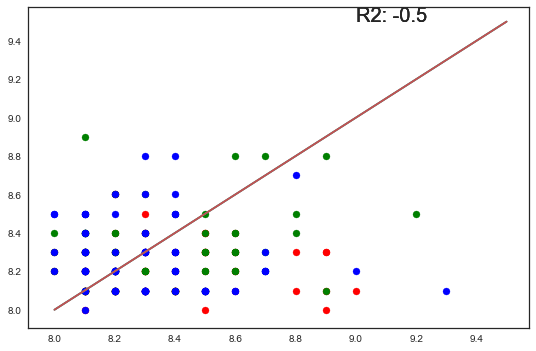

In [120]:
def do_plot(model, m=None):
    for fold, color in zip(cv, ['r', 'g', 'b']):
        X_train = X.iloc[fold[0]]
        X_test  = X.iloc[fold[1]]
        y_train = y.iloc[fold[0]]
        y_test  = y.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        plt.scatter(y_test, y_pred, color=color)
        plt.plot([8.0,9.5],[8.0,9.5])
        plt.text(9,9.5, "R2: "+str(m), fontsize=20, )
        
do_plot(dt, scores.mean().round(2))

Decision Tree Regressor does not perform too well here, trying Random Forest

### Random Forest

In [121]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

scores = cross_val_score(rf, X, y, cv=cv)
scores

array([-0.27489281,  0.02170525, -0.19506846])

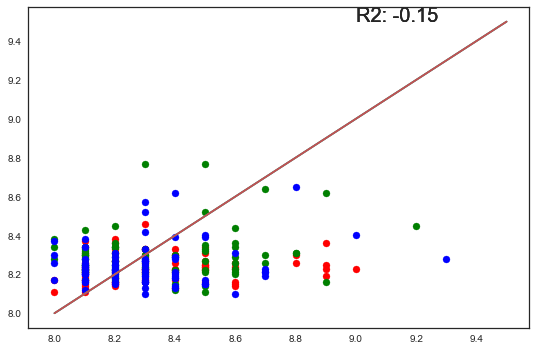

In [122]:
do_plot(rf, scores.mean().round(2))

Random Forest works a bit better on this dataset, data points look tighter now, but still not the best result.

### AdaBoost Regressor

In [123]:
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor()

scores = cross_val_score(ab, X, y, cv=cv)
scores

array([-0.02371291,  0.01110948, -0.01147769])

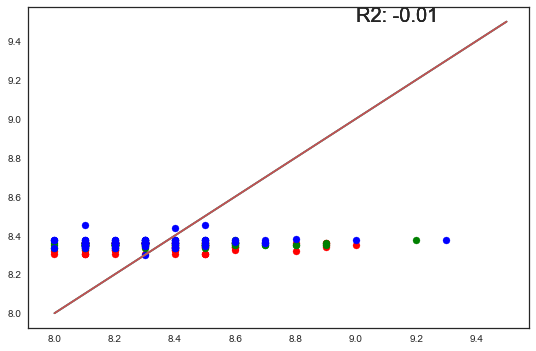

In [124]:
do_plot(ab, scores.mean().round(2))

### Gradient Boosting Regressor

In [125]:
from sklearn.ensemble import GradientBoostingRegressor


gb = GradientBoostingRegressor()

scores = cross_val_score(gb, X, y, cv=cv)
scores

array([-0.10343603,  0.13249573,  0.03293865])

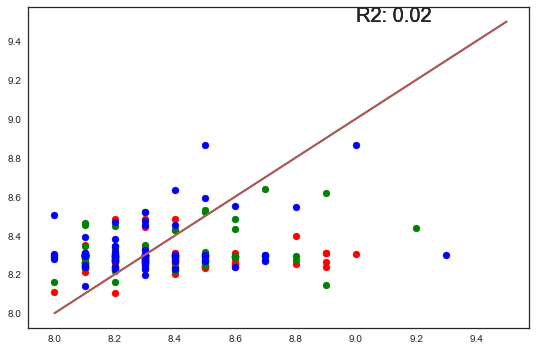

In [126]:
do_plot(gb, scores.mean().round(2))

I was trying to predict rating as continuous variable with not much success. Looking back at the dataset, I remind myself that I am fitting the models on rather homogeneous data and there's not much variety in the ratings - they are all between 8-10 points. Also, I am using all actors and directors - and I have almost 700 features, while my dataset is only 250 rows (and having more features than observations is not a good situation).

I'm going to filter the features that go into my models and use only actors that appeared in 2 movies or more
and directors that made the list more than once. Also, I will assign each rating a class - low, medium or high and use Classifier this time.

In [141]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [128]:
l= list(0 for i in xrange(0, 594))
actors_dict = dict( (k,v) for k,v in zip(unique_actors, l) )

In [129]:
# Counting the roles to later use only the names of the actors that appeared in more than one movie.
for actor in unique_actors:
    
    for i in range(len(data)):
        
        if actor in data.loc[i, 'cast2']:
            actors_dict[actor] +=1
            
        else:
            continue

In [130]:
actors_df = pd.DataFrame.from_dict(actors_dict, orient = 'index')
actors_df = actors_df.reset_index()
actors_df.columns = ['actor', 'number_movies']

actors_df.sort_values(by = 'number_movies', ascending = 0, inplace = True)

popul_actors = actors_df[actors_df['number_movies'] >=2 ]
lister = [x for x in popul_actors['actor']]

In [131]:
# Creating dummies for actors
for actor in lister:
    actor_list=[]
    for i in range(len(new_df)):
        
        if actor in new_df.loc[i, 'cast2']:
            actor_list.append(1)
        else:
            actor_list.append(0)
    new_df[actor] = actor_list

In [132]:
# Creating dummies for genres and later for directors
for gen in genres:
    genres_list=[]
    for i in range(len(new_df)):
        
        if gen in new_df.loc[i, 'genre']:
            genres_list.append(1)
        else:
            genres_list.append(0)
    new_df[gen] = genres_list

In [133]:
new_direct = new_df['directors'].value_counts().to_frame()
new_direct = new_direct.reset_index()
new_direct.columns = ['director', 'number_movies']

new_direct.sort_values(by = 'number_movies', ascending = 0, inplace = True)

popul_direct = new_direct[new_direct['number_movies']>=2 ]
listy = [x for x in popul_direct['director']]

In [134]:
for director in listy:
    top_direct_list=[]
    for i in range(len(new_df)):
        
        if director in new_df.loc[i, 'directors']:
            top_direct_list.append(1)
        else:
            top_direct_list.append(0)
    new_df[director] = top_direct_list

In [135]:
new_df.drop('image', inplace=True, axis=1)
new_df.drop('num_votes', inplace=True, axis=1)
new_df.drop('tconst', inplace=True, axis=1)
new_df.drop('title', inplace=True, axis=1)
new_df.drop('genre', inplace=True, axis=1)
new_df.drop('directors', inplace=True, axis=1)
new_df.drop('cast', inplace=True, axis=1)
new_df.drop('actor1', inplace=True, axis=1)
new_df.drop('actor2', inplace=True, axis=1)
new_df.drop('actor3', inplace=True, axis=1)
new_df.drop('cast2', inplace=True, axis=1)

In [136]:
## 1 for Lower Rating,  2 for Medium Rating,  3 for High Rating

rating_labels = []
for i in new_df['rating']:
    if i<=8.5:
        rating_labels.append(1)
    elif (i>8.5) and (i<=9):
        rating_labels.append(2)
    else:
        rating_labels.append(3)
        
new_df['rating_labels'] = rating_labels        

In [137]:
new_df.head(1)

,rating,year,Robert De Niro,Aamir Khan,Harrison Ford,Tom Hanks,Leonardo DiCaprio,Al Pacino,Brad Pitt,Clint Eastwood,...,John Huston,Federico Fellini,Rajkumar Hirani,David Lean,Fritz Lang,Terry Gilliam,George Roy Hill,Robert Zemeckis,Roman Polanski,rating_labels
0,9.3,1994,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [138]:
features = [x for x in new_df.columns if x not in ['rating','rating_labels']]
X = new_df[features]

X['year'] = MinMaxScaler().fit_transform(X['year'].astype(float).reshape(-1, 1))
y = new_df['rating_labels']


/Users/tetyanadzhula/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/tetyanadzhula/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision Tree Classifier

In [142]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)
# s = cross_val_score(dt, X, y)

# print("{} Score:\t{:0.3} ± {:0.3}".format("Decision Tree", s.mean().round(3), s.std().round(3)))

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [143]:
s = cross_val_score(dt, X_test, y_test)

print("{} Score:\t{:0.3} ± {:0.3}".format("Decision Tree", s.mean().round(3), s.std().round(3)))

Decision Tree Score:	0.68 ± 0.086


In [144]:
scores = cross_val_score(dt, X, y, cv=cv)
scores

array([ 0.78571429,  0.72289157,  0.6746988 ])

In [145]:
print (dt, scores.mean().round(2))

(DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), 0.72999999999999998)


In [152]:
y_pred = dt.predict(X_test)
conmat = np.array(confusion_matrix(y_test, y_pred))

confusion = pd.DataFrame(conmat, index=['lower score', 'medium score', 'high score'],
                        columns=['predicted_low(<8.5)','predicted_med(8.5 to 9)', 'predicted_high(9>)'])

print(confusion)

              predicted_low(<8.5)  predicted_med(8.5 to 9)  predicted_high(9>)
lower score                    52                       10                   1
medium score                    8                        3                   1
high score                      0                        0                   0


In [153]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.87      0.83      0.85        63
          2       0.23      0.25      0.24        12
          3       0.00      0.00      0.00         0

avg / total       0.76      0.73      0.75        75



We have pretty good chances in predicting low score ( 8.5 points and lower) - our f1 (balanced) is 85%

This model will not perform well with medium class - f1-score for it is only 24%

And looks like the model was not be able to predict 'high score' class. The 'support' column shows that 0 such cases made into the test dataset. 

Now looking at top 10 features that have the strongest relationship with the outcome variable.

In [154]:
feature_names = X.columns
pd.DataFrame({'feature':feature_names,
              'importance':dt.feature_importances_}).sort_values('importance',
                                                                      ascending=False).head(10)

,feature,importance
94,Crime,0.257749
0,year,0.190551
97,Thriller,0.119567
1,Robert De Niro,0.040296
101,Fantasy,0.039175
31,Humphrey Bogart,0.037574
96,Action,0.030900
98,Biography,0.030631
104,Comedy,0.028343
116,Christopher Nolan,0.026634


 I reduced the number of my features, used Classifier and got better performing model. It also confirmed again, that genres are very important. Robert De Niro had a very successful career, staring in several iconic movies and making the list of top 250 movies 7 times! We see his name as one of the important features and it makes sense. 
 
 Trying to understand what made these movies successful is not a very straightforward task, because we are already looking at the winners. Predictive models do not perform great when using small datasets (Top 250 movies in this case). The data is pretty homogeneous and without comparing it to the low rated movies it’s hard to tell what made top movies successful. We see that Crime and Drama movies are the most popular - but maybe there were a lot of low rated movies in that genre as well and maybe there was something else, that made these movies successful. 
 
 Overall, having more reviews, including reviews of low-rated movies, would help build better performing models and get more insight into what makes a movie highly rated, which in turn would help optimize recommendation engine.